<a href="https://colab.research.google.com/github/dnguyet06/B-i-t-p-AI/blob/main/v%C3%AD_d%E1%BB%A5_2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#input
temperature=ctrl.Antecedent(np.arange(0,5.1,0.1),'temperature')
humidity=ctrl.Antecedent(np.arange(0,3.1,0.1),'humidity')
number=ctrl.Antecedent(np.arange(0,3.1,0.1),'number')
#output
fan_speed=ctrl.Consequent(np.arange(0,3.1,0.1,),'fan_speed')
cooling_level=ctrl.Consequent(np.arange(0,3.1,0.1),'cooling_level')

In [3]:
temperature['c']=fuzz.trimf(temperature.universe,[0,0,1])
temperature['cl']=fuzz.trimf(temperature.universe,[0.5,1,1.5])
temperature['cm']=fuzz.trimf(temperature.universe,[1,2,3])
temperature['w']=fuzz.trimf(temperature.universe,[2,3,4])
temperature['h']=fuzz.trimf(temperature.universe,[3,4,5])
humidity['l']=fuzz.trimf(humidity.universe,[0,0,1])
humidity['m']=fuzz.trimf(humidity.universe,[0,1,2])
humidity['h']=fuzz.trimf(humidity.universe,[1,2,3])
number['f']=fuzz.trimf(number.universe,[0,0,1])
number['m']=fuzz.trimf(number.universe,[0,1,2])
number['ma']=fuzz.trimf(number.universe,[1,2,3])
fan_speed['l']=fuzz.trimf(fan_speed.universe,[0,0,1])
fan_speed['m']=fuzz.trimf(fan_speed.universe,[0.5,1,2])
fan_speed['h']=fuzz.trimf(fan_speed.universe,[1.5,2,3])
cooling_level['l']=fuzz.trimf(cooling_level.universe,[0,0.5,1])
cooling_level['m']=fuzz.trimf(cooling_level.universe,[0,1,2])
cooling_level['h']=fuzz.trimf(cooling_level.universe,[1,2,3])

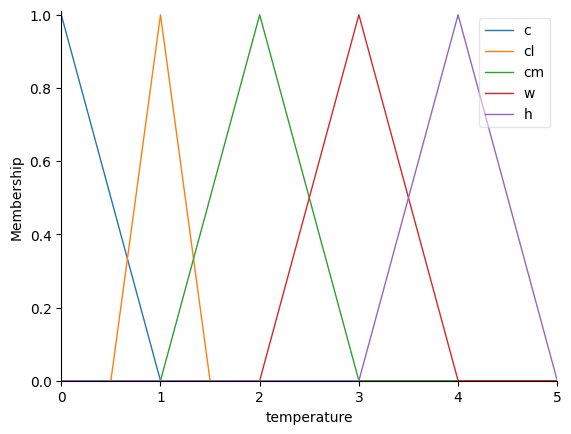

In [4]:
temperature.view()

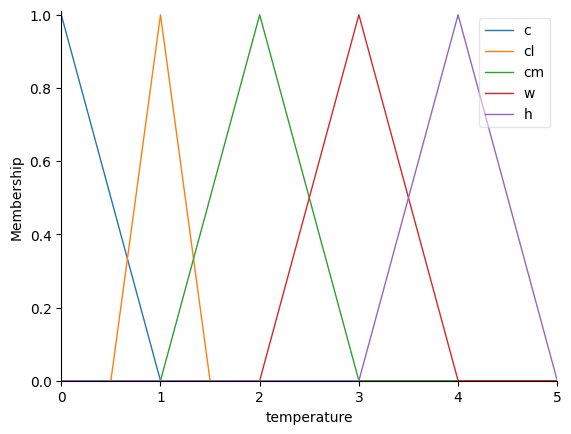

In [5]:
temperature.view()

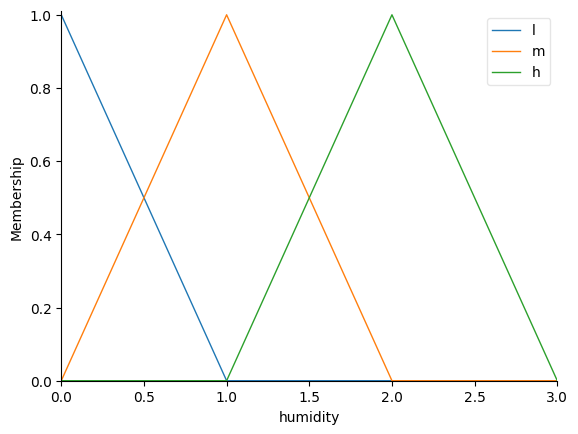

In [6]:
humidity.view()

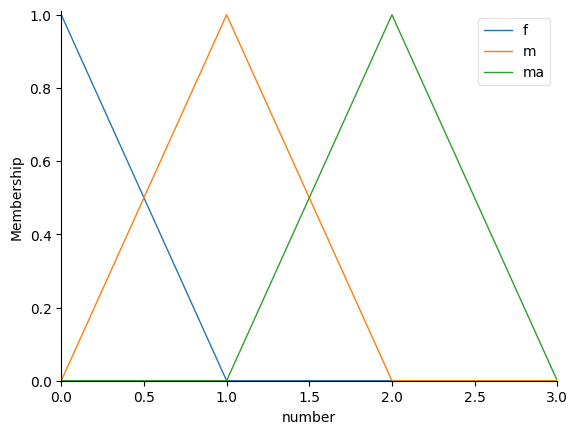

In [7]:
number.view()

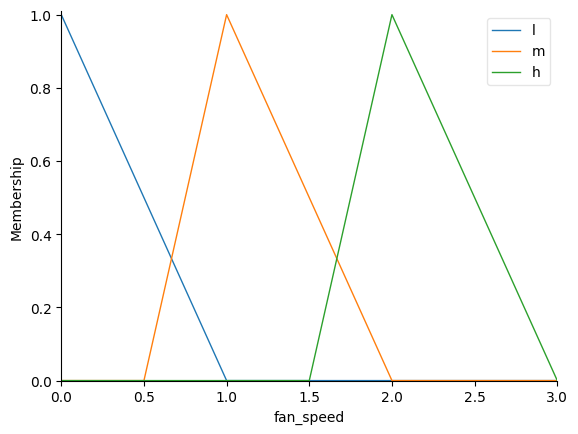

In [8]:
fan_speed.view()

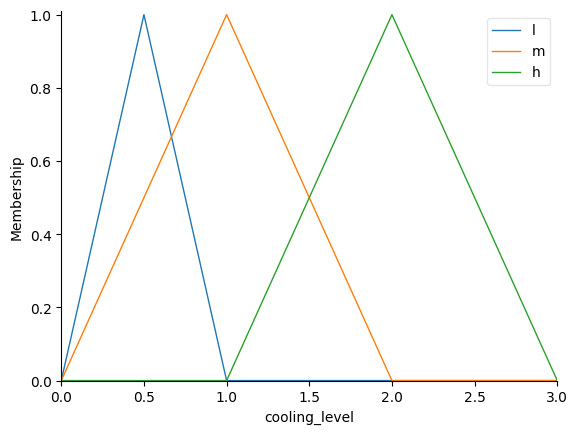

In [9]:
cooling_level.view()

In [10]:
#luật dựa trên nhiệt độ và tốc độ quạt
rule1=ctrl.Rule(temperature['c'],fan_speed['l'])
rule2=ctrl.Rule(temperature['cl'] ,fan_speed['l'])
rule3=ctrl.Rule(temperature['cm'] ,fan_speed['m'])
rule4=ctrl.Rule(temperature['w'] ,fan_speed['h'])
rule5=ctrl.Rule(temperature['h'],fan_speed['h'])
#luật dựa trên nhiệt độ và độ làm mát
rule6=ctrl.Rule(temperature['c'],cooling_level['l'])
rule7=ctrl.Rule(temperature['cl'],cooling_level['l'])
rule8=ctrl.Rule(temperature['cm'],cooling_level['m'])
rule9=ctrl.Rule(temperature['w'],cooling_level['h'])
rule10=ctrl.Rule(temperature['h'],cooling_level['h'])
#luật dựa trên độ ẩm và độ làm mát
rule11=ctrl.Rule(humidity['l'],cooling_level['l'])
rule12=ctrl.Rule(humidity['m'],cooling_level['m'])
rule13=ctrl.Rule(humidity['h'],cooling_level['h'])
#luật dựa trên số nguòi và tốc độ quạt
rule14=ctrl.Rule(number['f'],fan_speed['l'])
rule15=ctrl.Rule(number['m'],fan_speed['m'])
rule16=ctrl.Rule(number['ma'],fan_speed['h'])
#luật kết hợp
rule17=ctrl.Rule(temperature['h']&humidity['h']&number['ma'],[fan_speed['h'],cooling_level['h']])
rule18=ctrl.Rule(temperature['cm']&humidity['m']&number['m'],[fan_speed['m'],cooling_level['m']])
rule19=ctrl.Rule(temperature['cl']&humidity['l']&number['f'],[fan_speed['l'],cooling_level['l']])

0.8442060085836915
0.8850267379679143


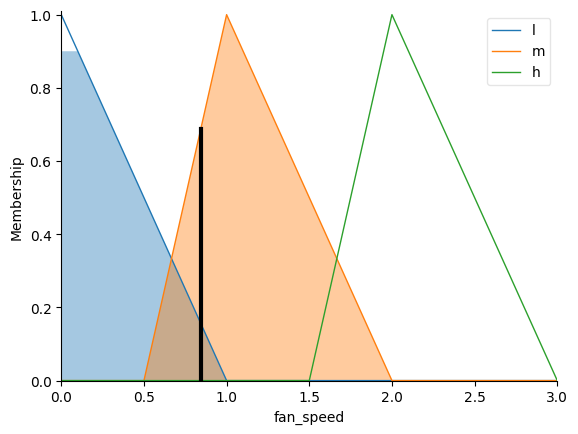

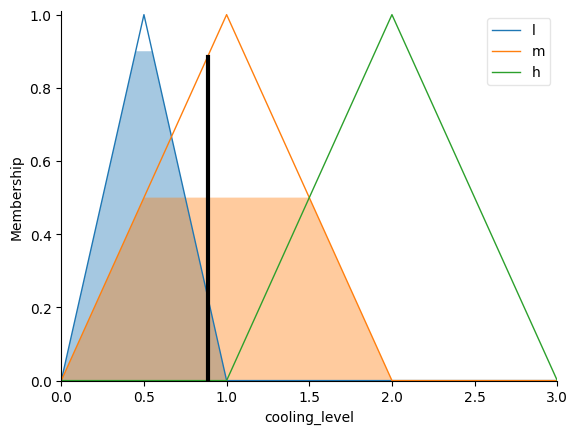

In [11]:
air_conditioning_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19])
sim=ctrl.ControlSystemSimulation(air_conditioning_ctrl)
sim.input['temperature']=0.1
sim.input['humidity']=0.5
sim.input['number']=1
sim.compute()
print(sim.output['fan_speed'])
print(sim.output['cooling_level'])
fan_speed.view(sim)
cooling_level.view(sim)